- planet data (csv generator)
- two FC layers
- resnet34 with 3 FC layers
- TTA

## Start

In [1]:
%reload_ext autoreload
%autoreload 2
%matplotlib inline

In [2]:
from fast_gen import *
from learner import *
from pt_models import *
from dataset_pt import *
from sgdr_pt import *

In [3]:
bs=48; sz=299
f_model = resnet34
path = "/data/jhoward/fast/dogscats/"

In [5]:
augs = [RandomRotate(10), RandomFlip(), RandomLighting(0.05, 0.05)]
tfms = ClassifierData.tfms_from_model(f_model, sz, max_zoom=1.1, aug_tfms=augs)
ds = ClassifierData.from_paths(path, bs, tfms)

In [6]:
learn = Learner(resnet34, ds, ps=0.01, opt_fn=SGD_Momentum(0.9))

-- freeze 9999


In [32]:
lrf=learn.lr_find(True)

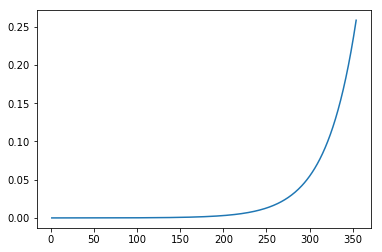

In [33]:
lrf.plot_lr()

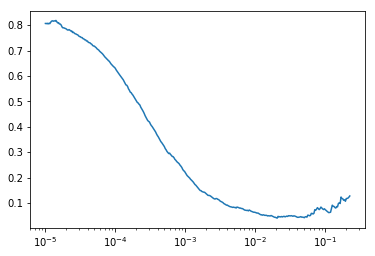

In [34]:
lrf.plot()

In [7]:
learn.fit_fc(2, 5e-3, cycle_len=1)

[0.038698243898793054, 0.02427363, 99.255966]


[0.02733430437420637, 0.021899587, 99.355164]



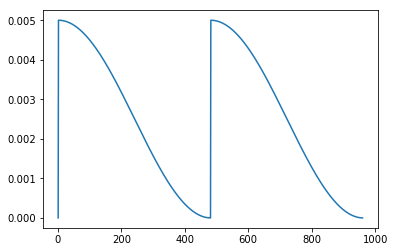

In [53]:
learn.sched.plot_lr()

In [9]:
learn.fit(1, 1e-5, cycle_len=1)

[0.026552885498275364, 0.021888843, 99.355164]



In [39]:
learn.freeze_to(-3)

-- freeze -3


In [40]:
lrf = learn.lr_find(start_lr=1e-7)

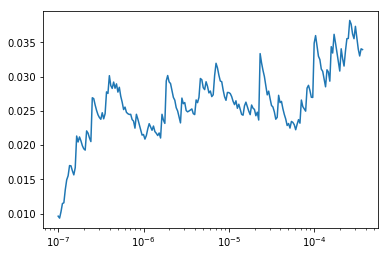

In [41]:
lrf.plot()

In [42]:
learn.fit(1, 1e-6, cycle_len=1)






[0.02729346755053415, 0.021475727, 99.305573]



## End

In [ ]:
tfm=lambda x: apply_gen(x, augs+[RandomScaleCenter(128, 1.05)])
ds = ClassifierData.from_paths(path, tfm, tfm, 2)
x,y=next(iter(ds.val_dl))
plt.imshow(x[0].numpy());

In [ ]:
PIL.Image.open(ds_scl.val_dl.dataset.fnames[0])